# Plotting routine for the Sep22 Event - PSP

In [1]:
test = 'test'

In [47]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
import os
#import copy as cp

import multiprocessing
import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

#plt.switch_backend('agg')


import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")
#logging.getLogger("sunpy").setLevel("WARNING")
#logging.getLogger("py3dcore_h4c.fluxplot").setLevel("WARNING")

#print(sns.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### setting the times for py3DCORE_h4c

In [48]:
t_launch = datetime.datetime(2022, 9, 5, 16, tzinfo=datetime.timezone.utc) # 

t_s = datetime.datetime(2022, 9, 5, 19, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 6, 8, tzinfo=datetime.timezone.utc)

t_fit = [
        datetime.datetime(2022, 9, 5, 20, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 22, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 6, 2, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 6, 4, tzinfo=datetime.timezone.utc)
     ]


#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [49]:
t_fit

[datetime.datetime(2022, 9, 5, 20, 30, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 5, 22, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 6, 2, 30, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 6, 4, 0, tzinfo=datetime.timezone.utc)]

In [50]:
path = 'output/psp05092022_heeq_512_4/'

filepath = fp.loadpickle(path, number = -1)

In [51]:
filepath[:-7]

'output/psp05092022_heeq_512_4/08'

#### extracting parameters

In [52]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  100.10
INFO:py3dcore_h4c.fluxplot: --lat:  50.62
INFO:py3dcore_h4c.fluxplot: --inc:  137.20
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.35
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  5.03
INFO:py3dcore_h4c.fluxplot: --launch radius:  13.55
INFO:py3dcore_h4c.fluxplot: --launch speed:  775.20
INFO:py3dcore_h4c.fluxplot: --t factor:  -93.82
INFO:py3dcore_h4c.fluxplot: --expansion rate:  1.14
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  5.59
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  1.66
INFO:py3dcore_h4c.fluxplot: --sw background speed:  389.80


In [53]:
print(allres)

[[  0.        107.24008    44.91428   ...   7.161485    1.2890644
   87.65636  ]
 [  0.         96.91984    46.142048  ...   7.231264    1.6234415
  244.32932  ]
 [  0.         94.14708    52.30874   ...   5.3489046   1.481564
  476.51526  ]
 ...
 [  0.        120.54813    50.810226  ...   6.379712    1.5745963
   70.754486 ]
 [  0.        116.06702    50.141342  ...   6.0769873   1.6568086
   54.28816  ]
 [  0.        101.228195   46.260216  ...   5.5513287   1.7097461
  213.80286  ]]


In [54]:
out = fp.get_ensemble_stats(filepath)

In [55]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,107.961411,50.907158,129.975189,0.325120,5.252005,10.436790,1346.947998,-44.386868,6.263731,1.443750,154.748230
std,7.688985,5.067101,8.118268,0.021263,0.547182,2.200203,356.644318,132.314880,0.638285,0.371331,88.797630
min,91.171844,26.580679,101.471687,0.243475,3.412755,5.101948,474.734253,-249.343246,5.004477,0.386805,50.188892
25%,102.349112,47.651514,124.551260,0.313790,4.915158,8.913102,1080.409607,-154.542969,5.773445,1.222065,87.497564
50%,107.377022,51.403664,129.996666,0.331319,5.356499,10.585238,1365.765991,-60.004230,6.228077,1.482160,136.682182
75%,113.225689,54.932830,135.505459,0.340624,5.681112,12.302839,1636.164703,61.183833,6.660097,1.731795,199.246445
max,137.153732,59.853020,150.624039,0.349991,5.991387,13.998618,1997.627441,245.947098,8.382895,1.994154,488.004028


#### loading and plotting the fitting results

INFO:py3dcore_h4c.fluxplot:No iparams_arr given, using parameters for run with minimum eps.
INFO:py3dcore_h4c.fluxplot:Plotting run with mean parameters.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: psp_2022sep.p


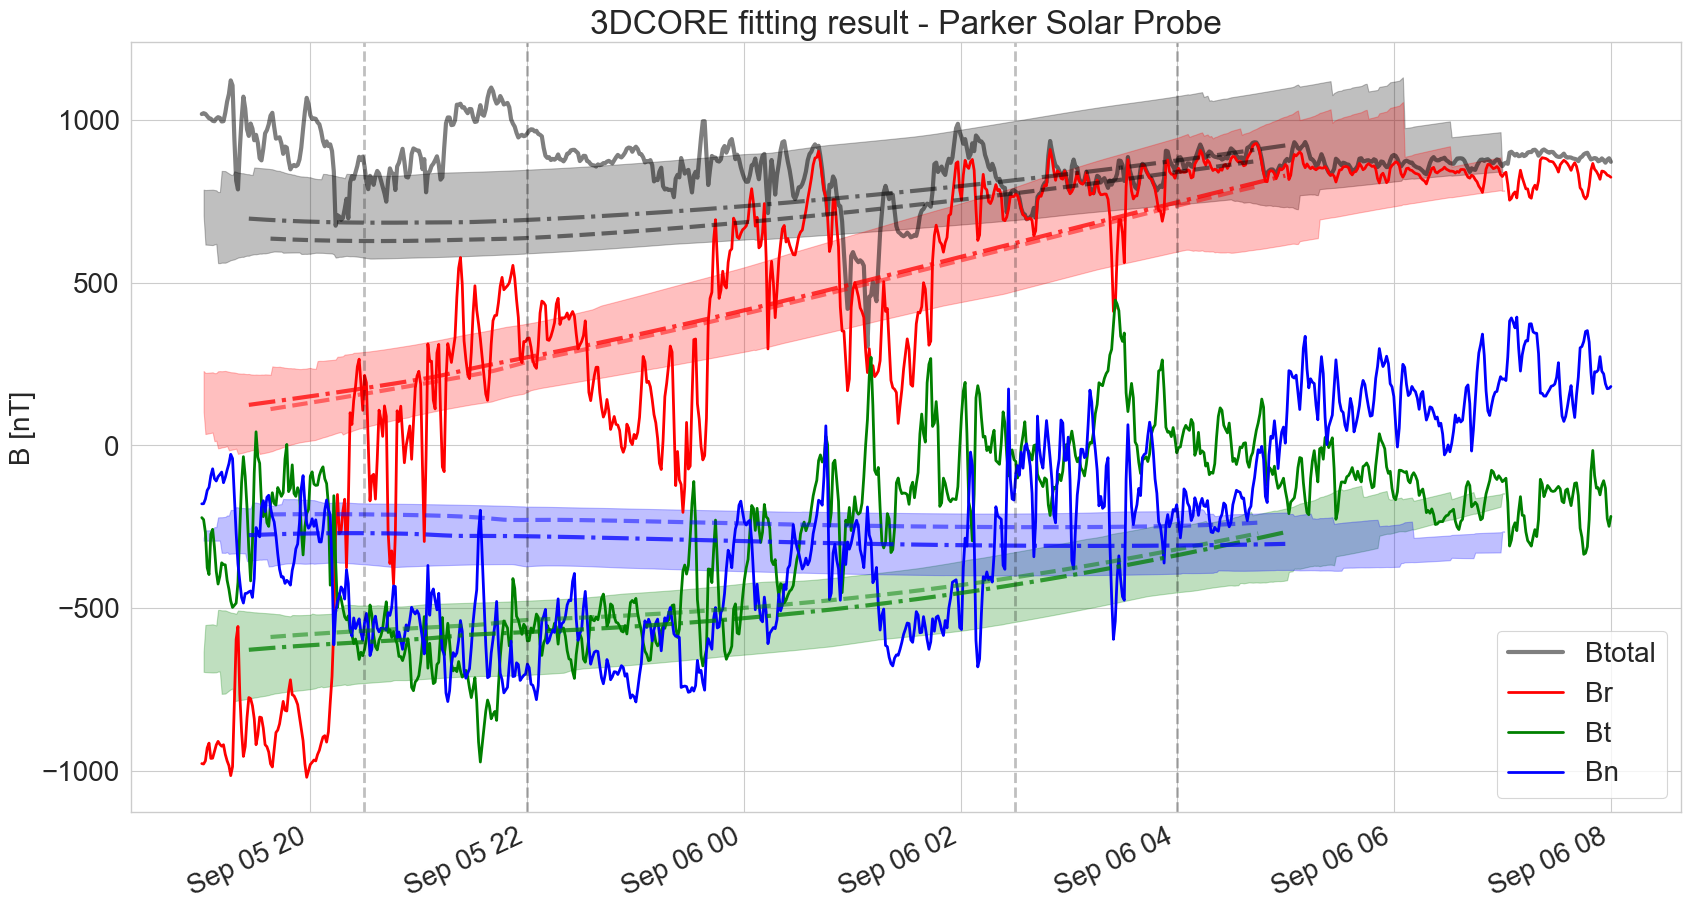

In [57]:
fp.fullinsitu(observer='PSP', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, 
              custom_data='psp_2022sep.p', best=True, ensemble=True, mean=True, save_fig=True, legend=True, fixed=None)

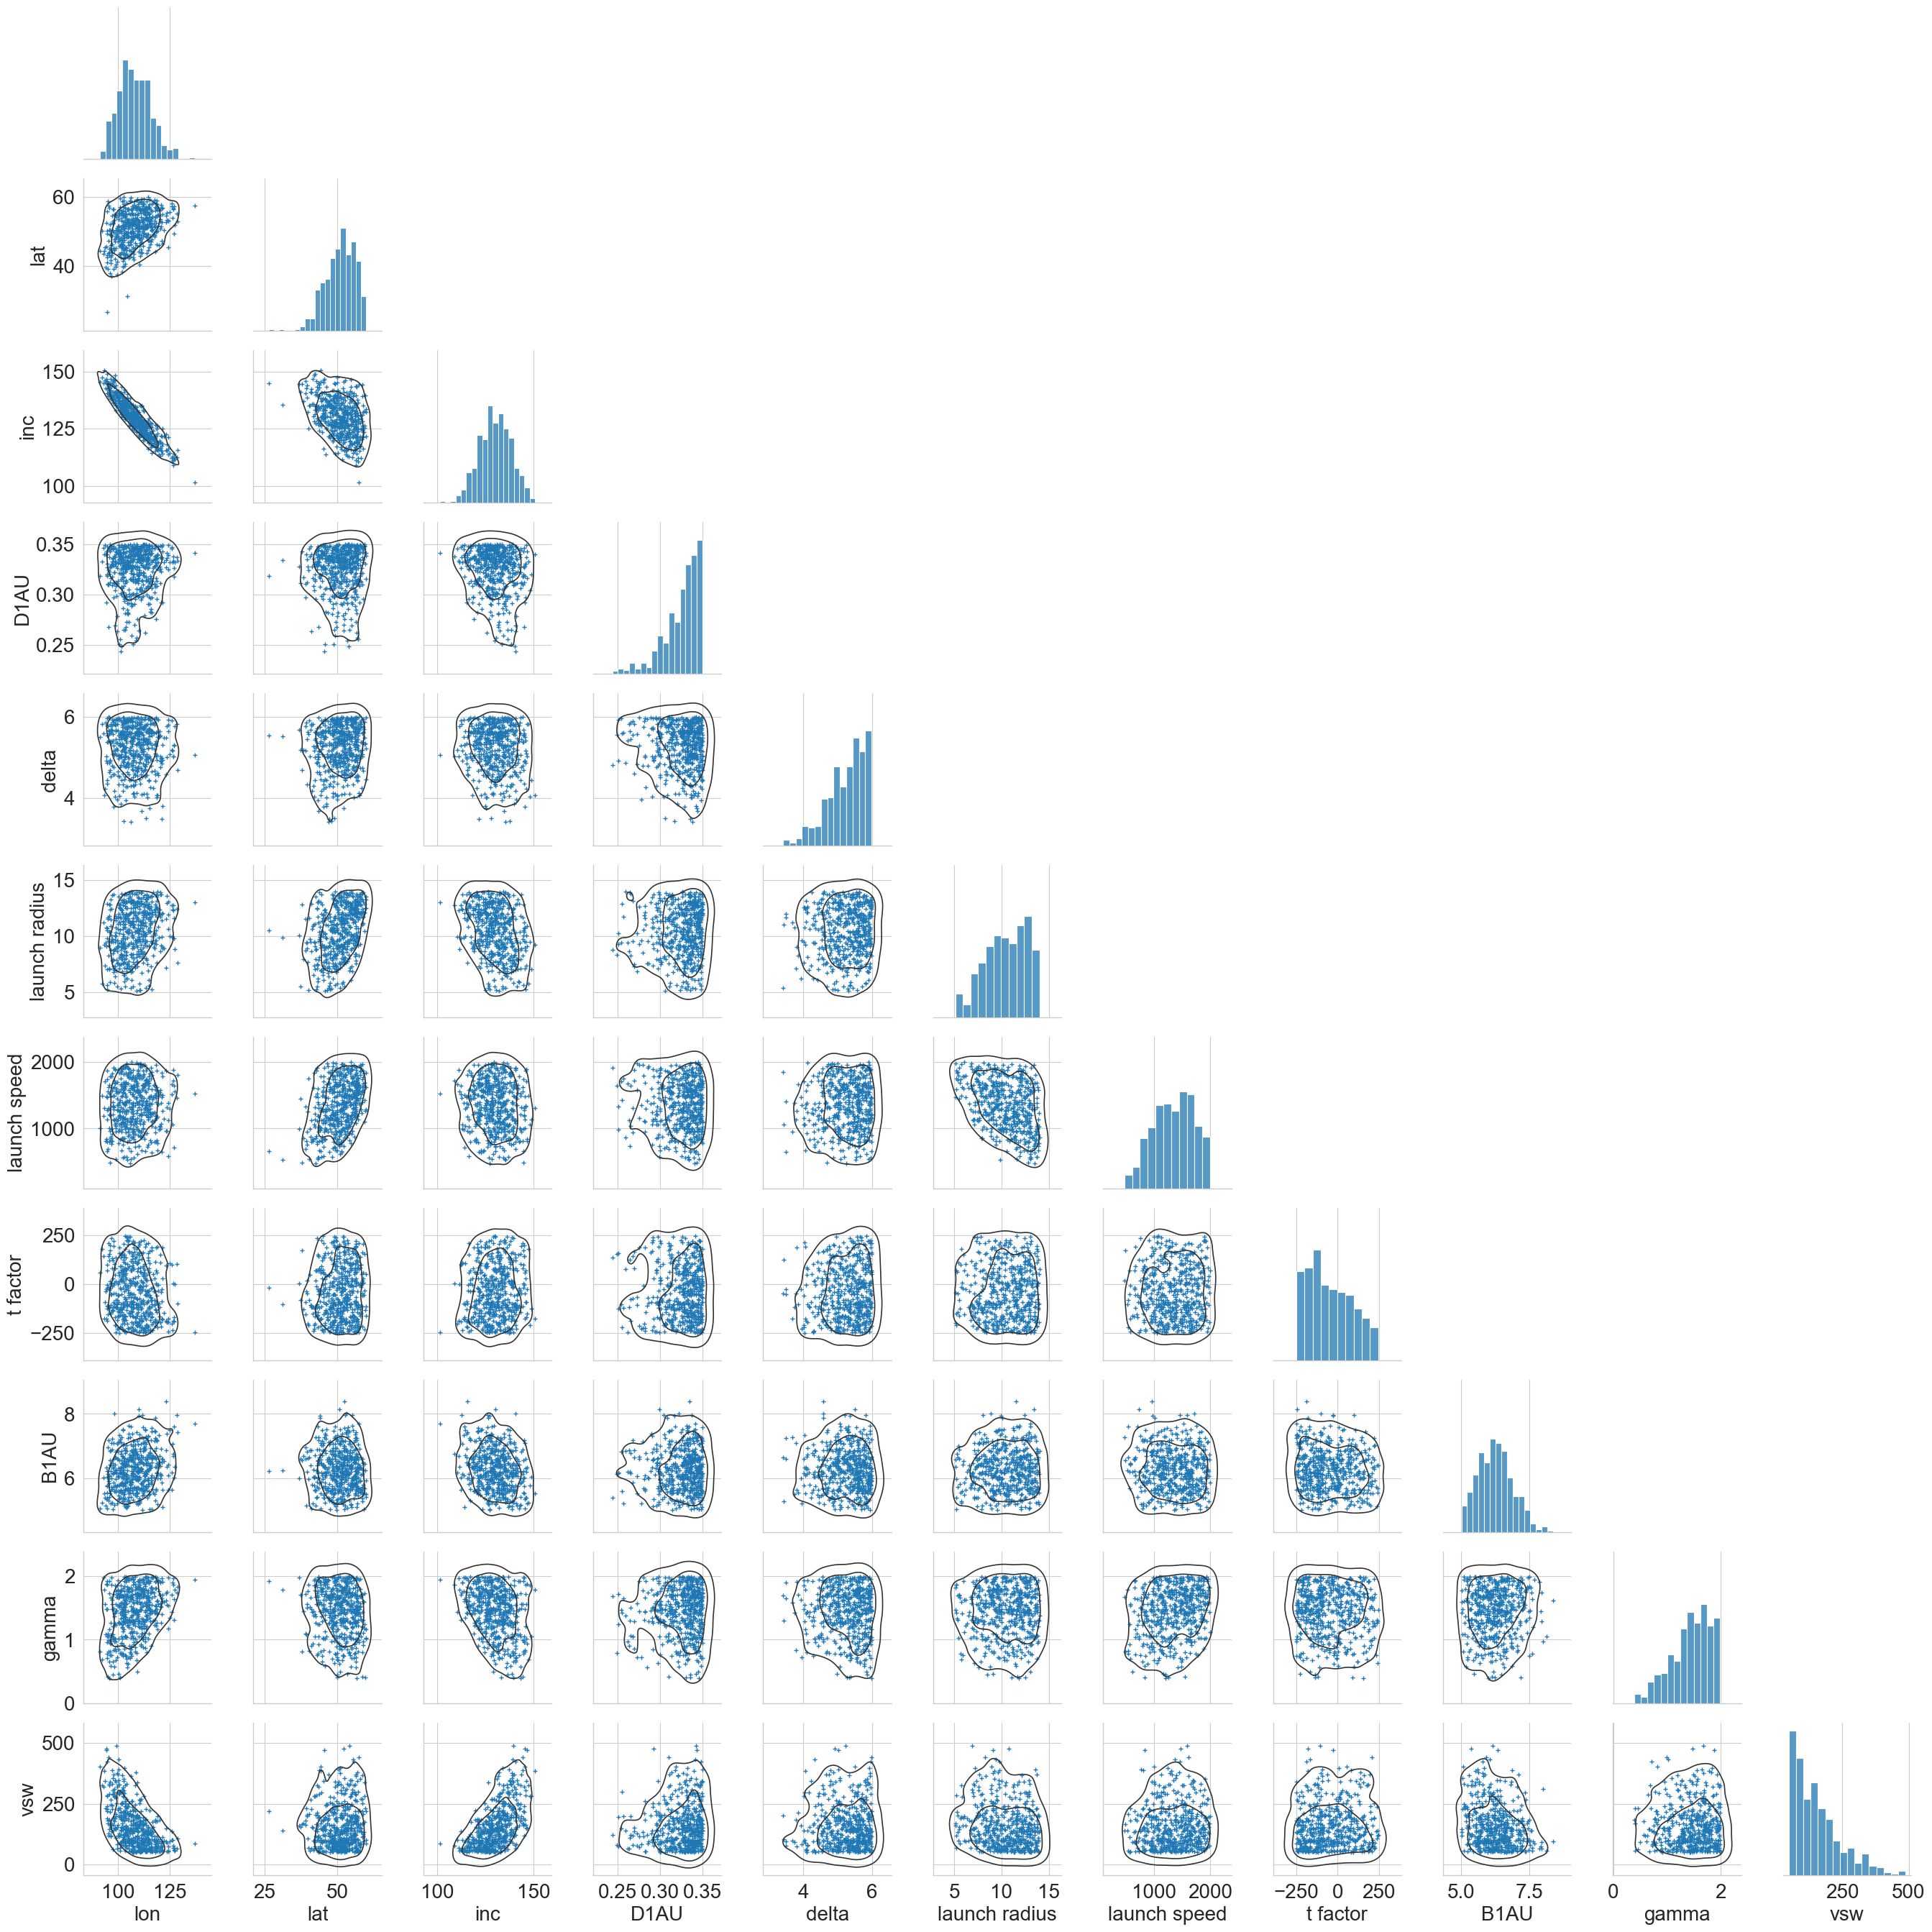

In [58]:
fp.scatterparams(filepath)

In [12]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

172.78905
4.882709
0.53428584
266.25516


#### Plotting the fluxrope and spacecraft positions

INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 4079
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.067216, lon: 128.088180, lat: -2.258282, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 2639
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.067216, lon: 128.088180, lat: -2.258282, 


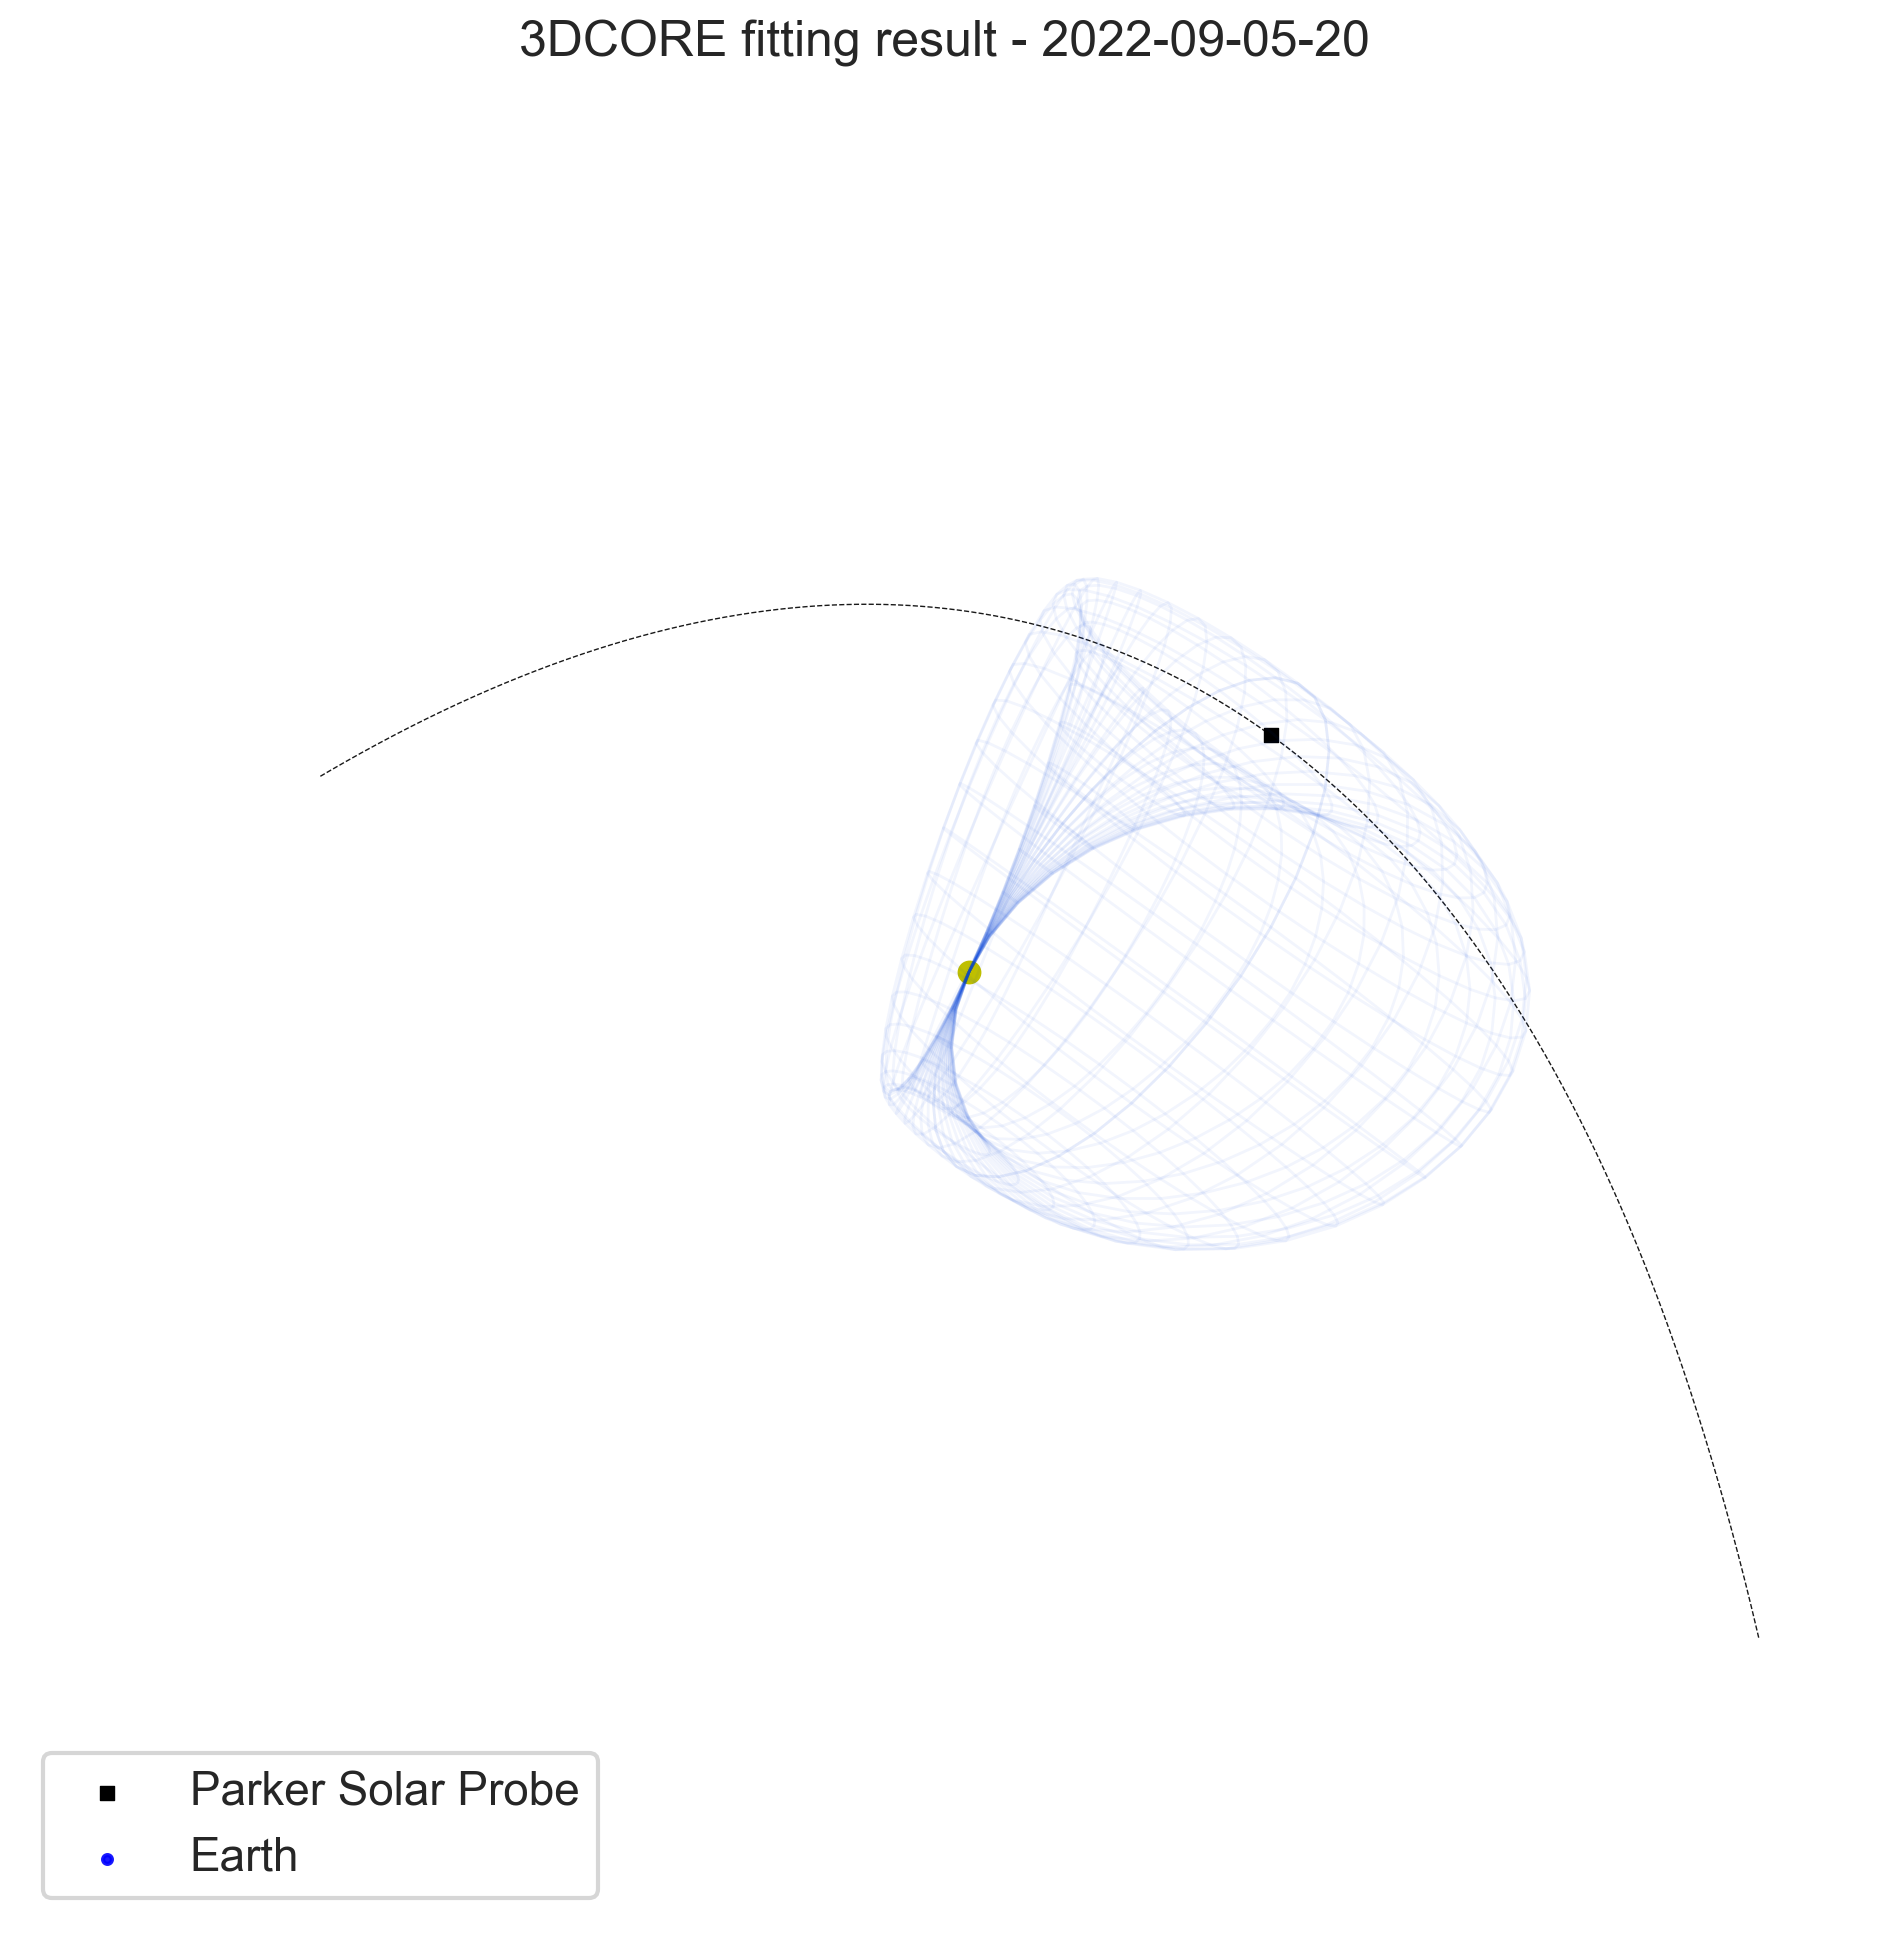

In [63]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
# tm1 = t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['psp'], t = tm1, filepath = filepath, custom_data='psp_sep2022.p') #, planetlist =['Earth']

### make fluxrope 3d movie

In [14]:
def make_frame(k):
    tm0 = datetime.datetime(2022, 9, 5, 19)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['solo', 'psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

In [15]:
inn=[i for i in range(100)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[0:20])
mpool.close()
mpool.join()

print('done 1/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[20:40])
mpool.close()
mpool.join()

print('done 2/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[40:60])
mpool.close()
mpool.join()

print('done 3/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[40:80])
mpool.close()
mpool.join()

print('done 4/4')

done 1/4
done 2/4
done 3/4
done 4/4


In [16]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

0

### plot fluxrope 3d multiview

INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 5399
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.069415, lon: 122.221279, lat: -1.921327, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 2519
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.069415, lon: 122.221279, lat: -1.921327, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 5159
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.683195, lon: 150.125030, lat: -3.752002, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 2279
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.683195, lon: 150.125030, lat: -3.752002, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 5399
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.069415, lon: 122.221279, lat: -1.921327, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 2519
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.069415, lon: 122.221279, lat: -1.921327, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 5159
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.683195, lon: 150.125030, lat: -3.752002, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 2279
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.683195, lon: 150.125030, lat: -3.752002, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 5399
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.069415, lon: 122.221279, lat: -1.921327, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 2519
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.069415, lon: 122.221279, lat: -1.921327, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 5159
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.683195, lon: 150.125030, lat: -3.752002, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 2279
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.683195, lon: 150.125030, lat: -3.752002, 


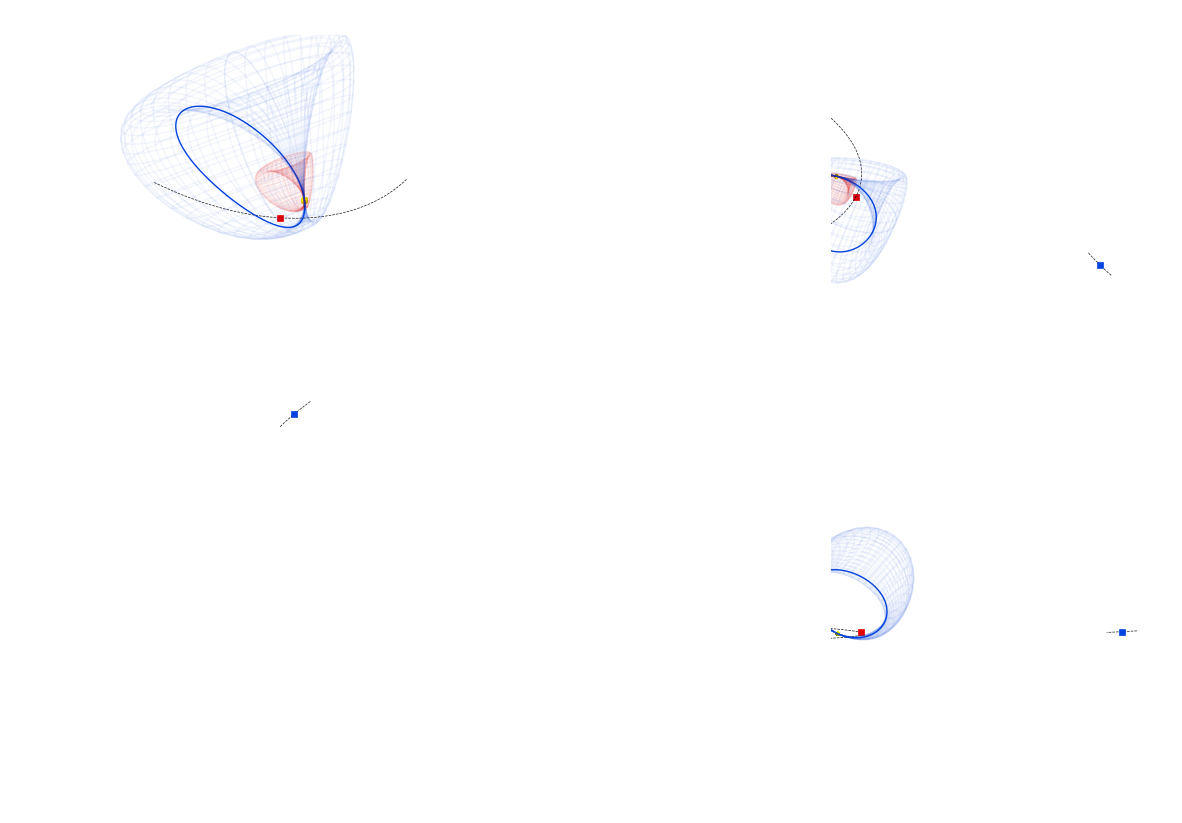

In [64]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

In [18]:
def make_frame2(k):
    tm0 = datetime.datetime(2022, 9, 5, 19)
    t = tm0 + k*datetime.timedelta(hours=1)
    frametime = k
    
    fig = fp.full3d_multiview_movie(t_launch = tm0, t = t, filepath=filepath,
                                    frametime=k)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d_multiview/'+frmstr+'.jpg',dpi=200)  
    return fig

In [19]:
inn=[i for i in range(100)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[0:20])
mpool.close()
mpool.join()

print('done 1/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[20:40])
mpool.close()
mpool.join()

print('done 2/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[40:60])
mpool.close()
mpool.join()

print('done 3/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[40:80])
mpool.close()
mpool.join()

print('done 4/4')

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
done 1/4
done 2/4
done 3/4
done 4/4


In [20]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d_multiview/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_multiview_movie.mp4 -y -loglevel quiet')

0

# Used for Debug

In [21]:
TP_A =  t_launch + datetime.timedelta(hours=2)
TP_B =  t_launch + datetime.timedelta(hours=40)


C_A = "xkcd:red"
C_B = "xkcd:blue"
    
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 11),dpi=100)

ax1 = plt.subplot2grid((2, 3), (0, 0),rowspan=2,colspan=2,projection='3d')  
ax2 = plt.subplot2grid((2, 3), (0, 2),projection='3d')  
ax3 = plt.subplot2grid((2, 3), (1, 2),projection='3d')  

model_obj = fp.returnmodel(filepath)


fp.plot_configure(ax1, view_azim=150, view_elev=25, view_radius=.2,light_source=True) #view_radius=.08

fp.plot_3dcore(ax1, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax1, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax1,0.31,-0.25,0.0,-0.2)


fp.plot_configure(ax2, view_azim=165-90, view_elev=90, view_radius=.08,light_source=True)
    
fp.plot_3dcore(ax2, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax2, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax2,0.26,-0.41,0.08,0.0)



fp.plot_configure(ax3, view_azim=65, view_elev=-5, view_radius=.01,light_source=True)
    
fp.plot_3dcore(ax3, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax3, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax3,0.26,-0.41,0.08,0.0)

